# Introduction

Today we will work with life expectancy data gathered from the World Health Organization (WHO) website. Our goal is to perform exploratory data analysis and use linear regression to understand the factors associated with increased life expectancy.

## Data retrival

Original dataset is hosted on the [Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who) platform. To avoid the hassle of logging in, we'll use a file generously posted on GitHub by a random internet user:

In [1]:
# Use wget console utility to download the csv data
!wget "https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv"

--2021-10-05 16:07:27--  https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306486 (299K) [text/plain]
Saving to: ‘Life_Expectancy_Data.csv’

Life_Expectancy_Dat 100%[===================>] 299.30K  --.-KB/s    in 0.03s   

2021-10-05 16:07:27 (9.05 MB/s) - ‘Life_Expectancy_Data.csv’ saved [306486/306486]



In [2]:
# Make sure that we actually downloaded Life_Expectancy_Data.csv file
!ls

Life_Expectancy_Data.csv  sample_data


# Exploratory data analysis (EDA)

In short, EDA is a vaguely defined term that describes the process of “getting to know data”. Often includes preprocessing, visualization, and data summarization.

We'll start from scratch and first load our dataset and get a list of the available features.

In [3]:
import pandas as pd

# load the dataset (df stands for the DataFrame)
df = pd.read_csv("Life_Expectancy_Data.csv")

In [4]:
# print the 'shape' of the matrix
print(f"Rows x columns: {df.shape}")

Rows x columns: (2461, 23)


In [7]:
# print first 4 lines
df.head(n=4)

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8


There are 23 features and 2461 entries in total. Our target variable is called `Life_expectancy`.


## Preprocessing

Always rename columns if they contain unexpected spaces, forward slashes (/) or follow awkward naming schemes.

In [8]:
# Dictionary(mapping), old name -> new name
mapping = {
  'Life_expectancy ': 'Life expectancy',
  'Adult_Mortality': 'Adult mortality',
  'infant_deaths': 'Infant deaths',
  'percentage_expenditure': 'Percentage expenditure',
  'Hepatitis_B': 'Hepatitis B', 
  'Measles ': 'Measles', 
  ' BMI ': 'BMI', 
  'under_five_deaths ': 'Under-five deaths',
  'Total_expenditure': 'Total expenditure', 
  'Diphtheria ': 'Diphtheria', 
  ' HIV/AIDS': 'HIV/AIDS',
  ' thinness  1-19 years': 'Thinnes (1-19 years)', 
  ' thinness 5-9 years': 'Thinnes (5-9 years)',
  'Income_composition_of_resources': 'Income composition of resources'
}
# Rename columns
df.rename(columns=mapping, inplace=True) # inplace is important! - changing old with new ones
# without inplace
# df = df.rename(columns=mapping)

In [9]:
# Check the header
df.head(n=3)

,Country,Continent,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9


Let's check if there are any missing values.

In [10]:
# Special function to print inferred data types for all columns, 
# whether or not they contain null (missing) values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2461 non-null   object 
 1   Continent                        2461 non-null   object 
 2   Year                             2461 non-null   int64  
 3   Status                           2461 non-null   object 
 4   Life expectancy                  2461 non-null   float64
 5   Adult mortality                  2461 non-null   int64  
 6   Infant deaths                    2461 non-null   int64  
 7   Alcohol                          2461 non-null   float64
 8   Percentage expenditure           2461 non-null   float64
 9   Hepatitis B                      1997 non-null   float64
 10  Measles                          2461 non-null   int64  
 11  BMI                              2461 non-null   float64
 12  Under-five deaths   

Unfortunately, the dataset is not complete — several columns have missing values. How many nulls are there in each column?

In [11]:
# Calculate total number of nulls for each column:

# 1. isnull() returns a mask, where null values is replaced with True
isnull = df.isnull()
# 2. Count True(=null) records for each columns
isnull = isnull.sum()
# 3. print columns with 1 or more null value
isnull[isnull > 0]

Hepatitis B                        464
Polio                                8
Total expenditure                  152
Income composition of resources      3
Schooling                            3
dtype: int64

Let's discuss the following questions:

* *What can we do with null values?* 
* *Can you imagine situations where one strategy is preferred over the other one?*
* *What strategies are preffered for large/small datasets?*

In [12]:
print(f"Rows before: {df.shape[0]}")

# Drop null rows(records)

# 1. Again, matrix with True in place of nulls 
isnull = df.isnull()
# 2. Logical OR row-wise(axis=1). Are there ANY true value in each row?
isnull = isnull.any(axis=1)
# sum true values = number of rows with nulls
print(f"\tWill be dropped {isnull.sum()} rows")
# 3. Select only rows without null values
notnull = ~isnull # ~ stands for NOT
df = df[notnull]

print(f"Rows after: {df.shape[0]}")
# Same as above
# df.dropna(axis='index', how='any', inplace=True) # index = rows

Rows before: 2461
	Will be dropped 608 rows
Rows after: 1853


Typically, pandas can automatically detect the datatype for columns with only numeric or date records. 

However, you will often come across datasets in which NULL values ​​are replaced with strings such as "Unknown", "NA". Another example is categorical columns built from strings.

In these cases, pandas uses the dtype `object` to efficiently store the full variety of data.

Here is an example for our dataset:

In [ ]:
# dtypes stands for Data Types
df.dtypes

Country                             object
Continent                           object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult mortality                      int64
Infant deaths                        int64
Alcohol                            float64
Percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
Under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                          object
HIV/AIDS                           float64
GDP                                float64
Population                          object
Thinnes (1-19 years)               float64
Thinnes (5-9 years)                float64
Income composition of resources    float64
Schooling                          float64
dtype: obje

In most cases, you want to get rid of `object` columns by converting them to categorical or numeric dtypes. It eases the analysis and eliminates silly errors that might arise during future analysis.

In practice, this is achieved by careful column-to-column analysis of the data:

In [13]:
# Print all unique values
print("Unique continents:", df['Continent'].unique())
# No unusuall entries -> cast column to categorical data type
df['Continent'] = df['Continent'].astype('category')

print(f"New continent data type: {df['Continent'].dtype}")

Unique continents: ['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Australia'
 'Oceania' 'Asia/Europe']
New continent data type: category


In [14]:
# Similarly, cast Country and Status to categorical
print('Status types:', df['Status'].unique())
df['Status'] = df['Status'].astype('category')

df['Country'] = df['Country'].astype('category')

Status types: ['Developing' 'Developed']


In [15]:
# The new categorical columns include a .cat property with a .categories nested 
# property that lists all the available categories for the column:
print("Countries: ", df['Country'].cat.categories)

Countries:  Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Zambia', 'Zimbabwe'],
      dtype='object', length=147)


Please, use `df[column].value_counts()`and `df[column].unique()` to make sure 
that the following conversions are suitable:

In [23]:
# Skip records with unknown population
mask = df['Population'] != 'Unknown'
df = df[mask]
# Cast column to float data type
df['Population'] = df['Population'].astype(float)

In [18]:
df['Population'].value_counts()

718239.0      2
1141.0        2
851967.0      1
2771.0        1
5843831.0     1
             ..
1373513.0     1
16995583.0    1
1471826.0     1
517461.0      1
5216.0        1
Name: Population, Length: 1647, dtype: int64

In [19]:
df['Population'].unique()

array([33736494.,   327582., 31731688., ...,   125525., 12366165.,
       12222251.])

In [20]:
df['Diphtheria'] = df['Diphtheria'].astype(int)

In [21]:
df['Diphtheria'].value_counts() 

99    180
98    146
95    121
96    117
97    110
     ... 
37      1
46      1
51      1
52      1
2       1
Name: Diphtheria, Length: 66, dtype: int64

In [22]:
df['Diphtheria'].unique()

array([65, 62, 64, 67, 68, 66, 63, 58,  5, 41, 36, 33, 24, 99, 98, 97, 95,
       93, 88, 86, 77, 75, 71,  6, 69, 73, 94, 91, 96, 89, 87,  9, 92, 83,
       85, 84, 81, 79, 78, 76,  8, 82, 74,  7, 72, 47, 23, 45, 42, 37, 39,
        4, 19,  2, 61, 54, 51, 57, 48, 59, 49, 46, 53, 55, 26, 52])

Make sure we no longer have `object` columns:

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          1649 non-null   category
 1   Continent                        1649 non-null   category
 2   Year                             1649 non-null   int64   
 3   Status                           1649 non-null   category
 4   Life expectancy                  1649 non-null   float64 
 5   Adult mortality                  1649 non-null   int64   
 6   Infant deaths                    1649 non-null   int64   
 7   Alcohol                          1649 non-null   float64 
 8   Percentage expenditure           1649 non-null   float64 
 9   Hepatitis B                      1649 non-null   float64 
 10  Measles                          1649 non-null   int64   
 11  BMI                              1649 non-null   float64 
 12  Under-

That's all for now! But is that all we need before moving on to visualization?...

In fact, the following table is a key part of "preprocessing" in a broad sense.

You **must** understand your data, know what the numeric values ​​in each column mean, before going any further.

|Field|Description|
|---:|:---|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|Percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|Under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|Thinness (1-19 years)|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|Thinness (5-9 years)|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

## Visualization

We will start our visualization with simple box plots, which usually have the following notation:

![boxplots](https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png)


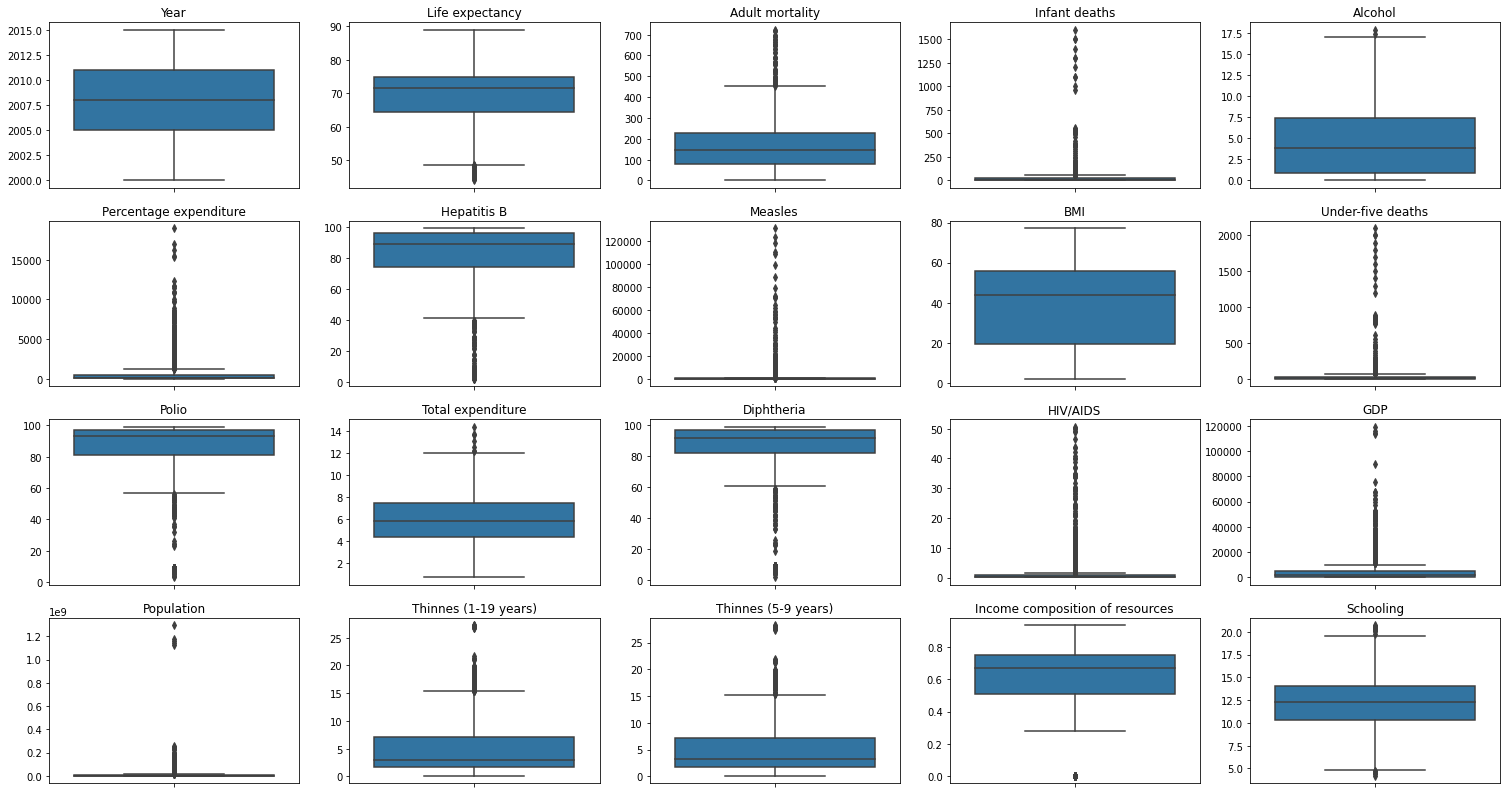

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get numeric columns only- return columns only numeric 
numeric = list(df.select_dtypes(include=np.number).columns)

# Create figure with 20 subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26, 14))
# By default, axes is a 4x5 matrix, ravel it to a flat array with 20 elements
axes = axes.ravel()

# Sanity check
assert len(numeric) == len(axes)

# Plot boxplot for each numeric column
for col, ax in zip(numeric, axes):
  sns.boxplot(y = df[col], ax=ax)
  #sns.violinplot(y = numeric[col], ax=ax)
  ax.set_title(col)
  ax.set(xlabel='', ylabel='')

In [26]:
axes.shape

(20,)

`describe` method is a nice complementary way to better understand the composition of each column:

In [28]:
# Perform `describe` only for numeric columns
df[numeric].describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


We can also create a histogram for each column using the built-in pandas method:

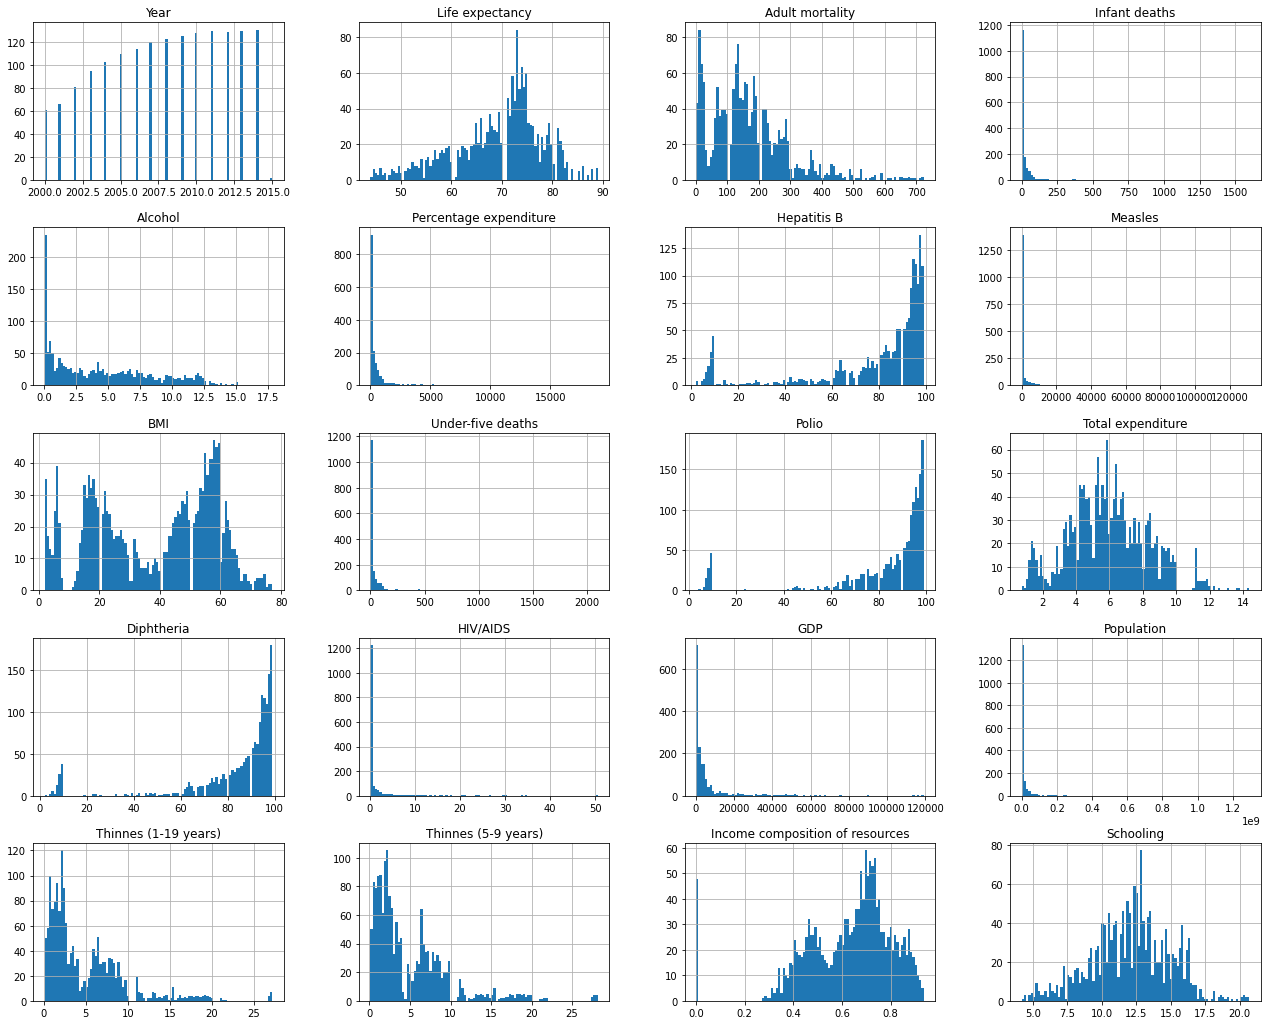

In [29]:
# `_ =` construct to ignore return data from the hist method  
_ = df[numeric].hist(figsize=(22, 18), bins=100)

Discussion time!

* *Do we have columns that look extremely suspicious in general?*
* *Are there "special" values ​​in any of the numeric columns?*
* *What can we do with the outliers?*

One way to deal with outliers is to "trim" the data and keep only records where values in each column are within [$\alpha$, 1-$\alpha$] percentiles.

In [36]:
print(f"Records before: {len(df)}")

# Get 0.01 and 0.99 percentile for each column, alpha = 0.01
low, high = 0.01, 0.99
quantiles = df[numeric].quantile([low, high])

# Remove Year column from the 'trimming' procedure
quantiles.drop(columns=['Year'], inplace=True)

for col in quantiles.columns:
  low, high = quantiles[col].tolist()
  mask = (df[col] > low) & (df[col] < high)
  df = df[mask]

print(f"Records after: {len(df)}")


Records before: 1313
Records after: 156


In [37]:
quantiles

,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling
0.01,49.512,8.00,0.00,0.0100,2.558200,7.0,0.00,2.800,0.00,8.0,1.3900,8.0,0.100,38.563706,2.137240e+03,0.200,0.200,0.34300,5.900
0.99,83.880,497.88,184.64,13.1004,6643.322878,99.0,24162.64,67.576,242.28,99.0,11.2276,99.0,21.276,42461.894629,1.403554e+08,18.588,18.576,0.89188,17.076


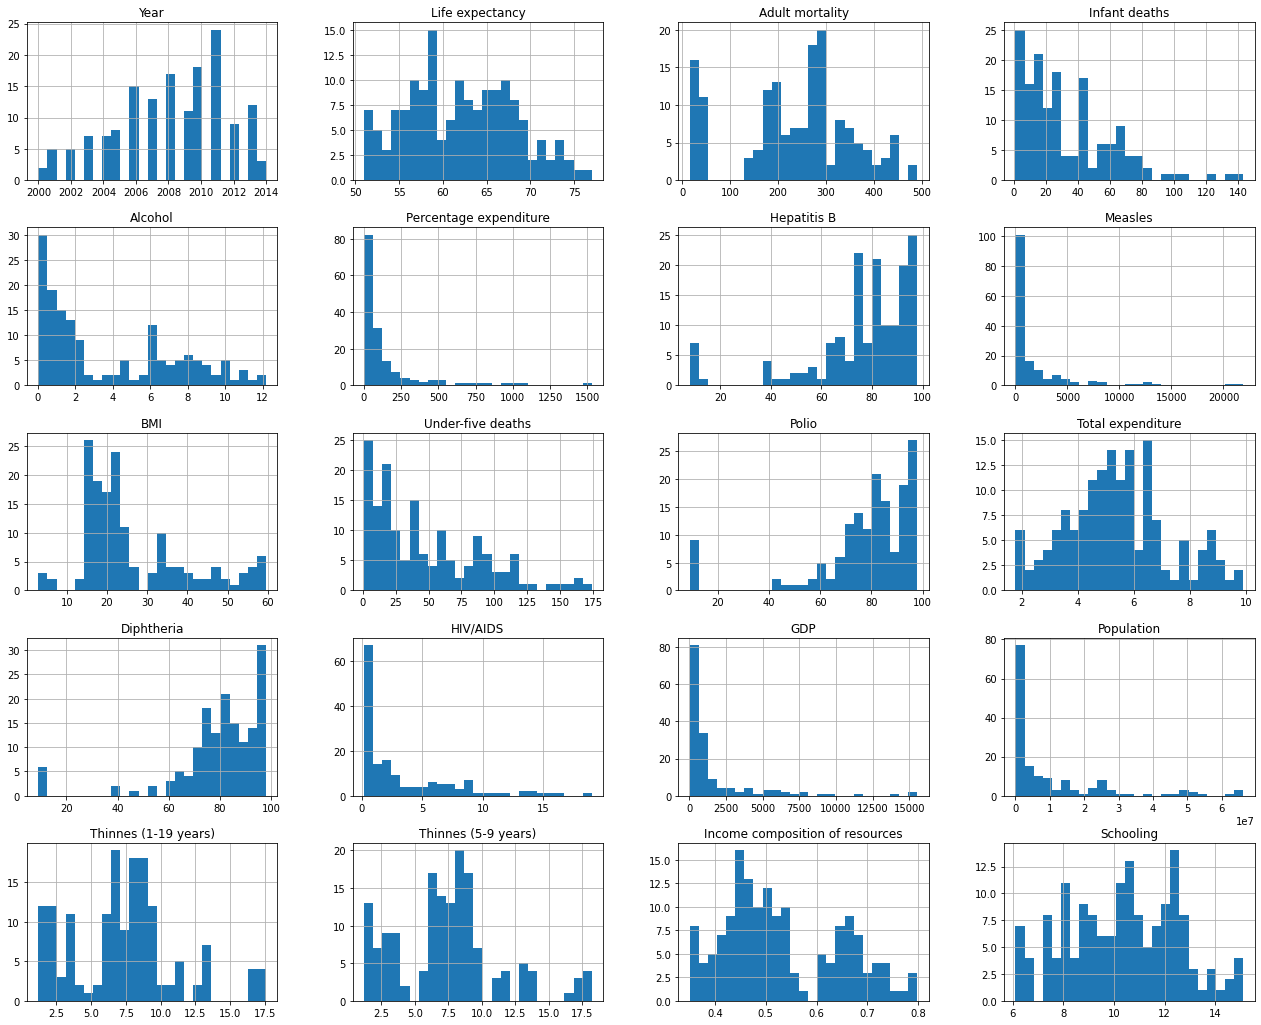

In [38]:
_ = df[numeric].hist(figsize=(22, 18), bins=25)

So, we dropped about 300 records, but there is still a suspicious peak at '0' for the income composition of resources... 

*Why?*

In [39]:
print(f"Recods before: {len(df)}")
df = df[df['Income composition of resources'] > 1e-6]
print(f"Recods after: {len(df)}")

Recods before: 156
Recods after: 156


Okay, all the fuss is interesting, but let's get down to business. We are (presumably) paid to interpret, not clean up the data(even if it is a part of the process).

Building a correlation heatmap is a good place to start:

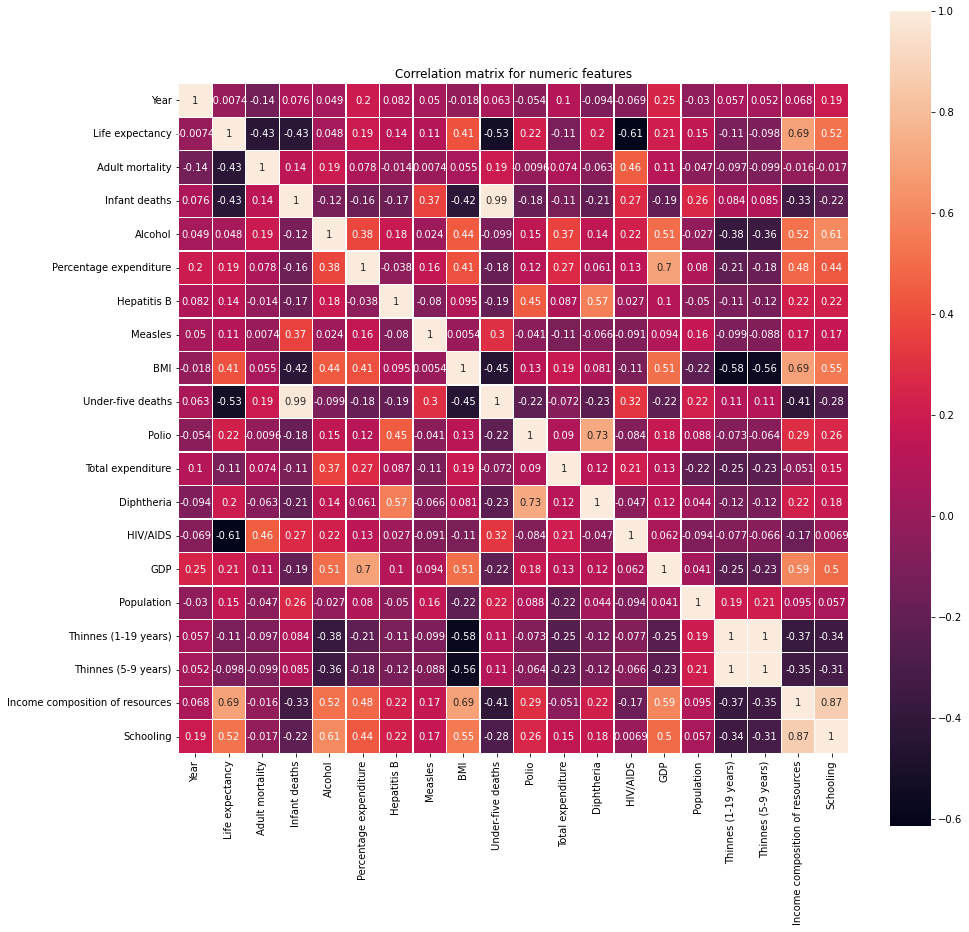

In [40]:
correlations = df[numeric].corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.25)
plt.title("Correlation matrix for numeric features")
plt.show()

* *What expected / unexpected correlations can one find here?*
* *Can you explain them with common sense?*

Never forget that correlation does not imply causation. [Here](https://www.tylervigen.com/spurious-correlations) are a few funny examples.

Can you explain them with common sense?

To keep you busy a little longer, here is the relationship between durability and each feature:

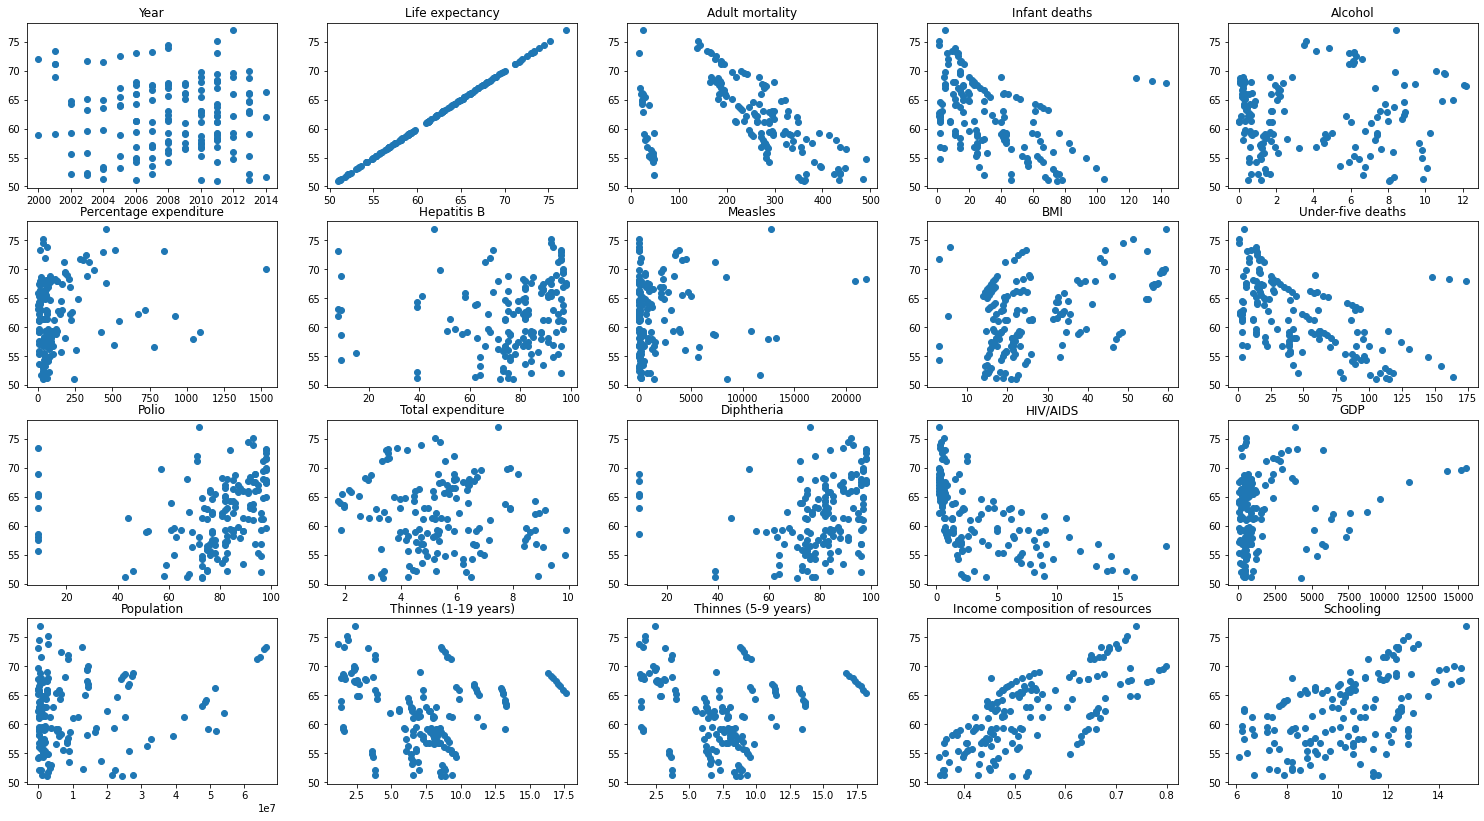

In [41]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26, 14))
axes = axes.ravel()

for ax, col in zip(axes, numeric):
  ax.scatter(df[col], df['Life expectancy'])
  ax.set_title(col)

What does it take to confidently argue that overall life expectancy increased from 2000 to 2015?

In other words, imagine that you have to defend this point of view during a WHO meeting. What tools/graphs would you use?

The game, find your country, has begun:

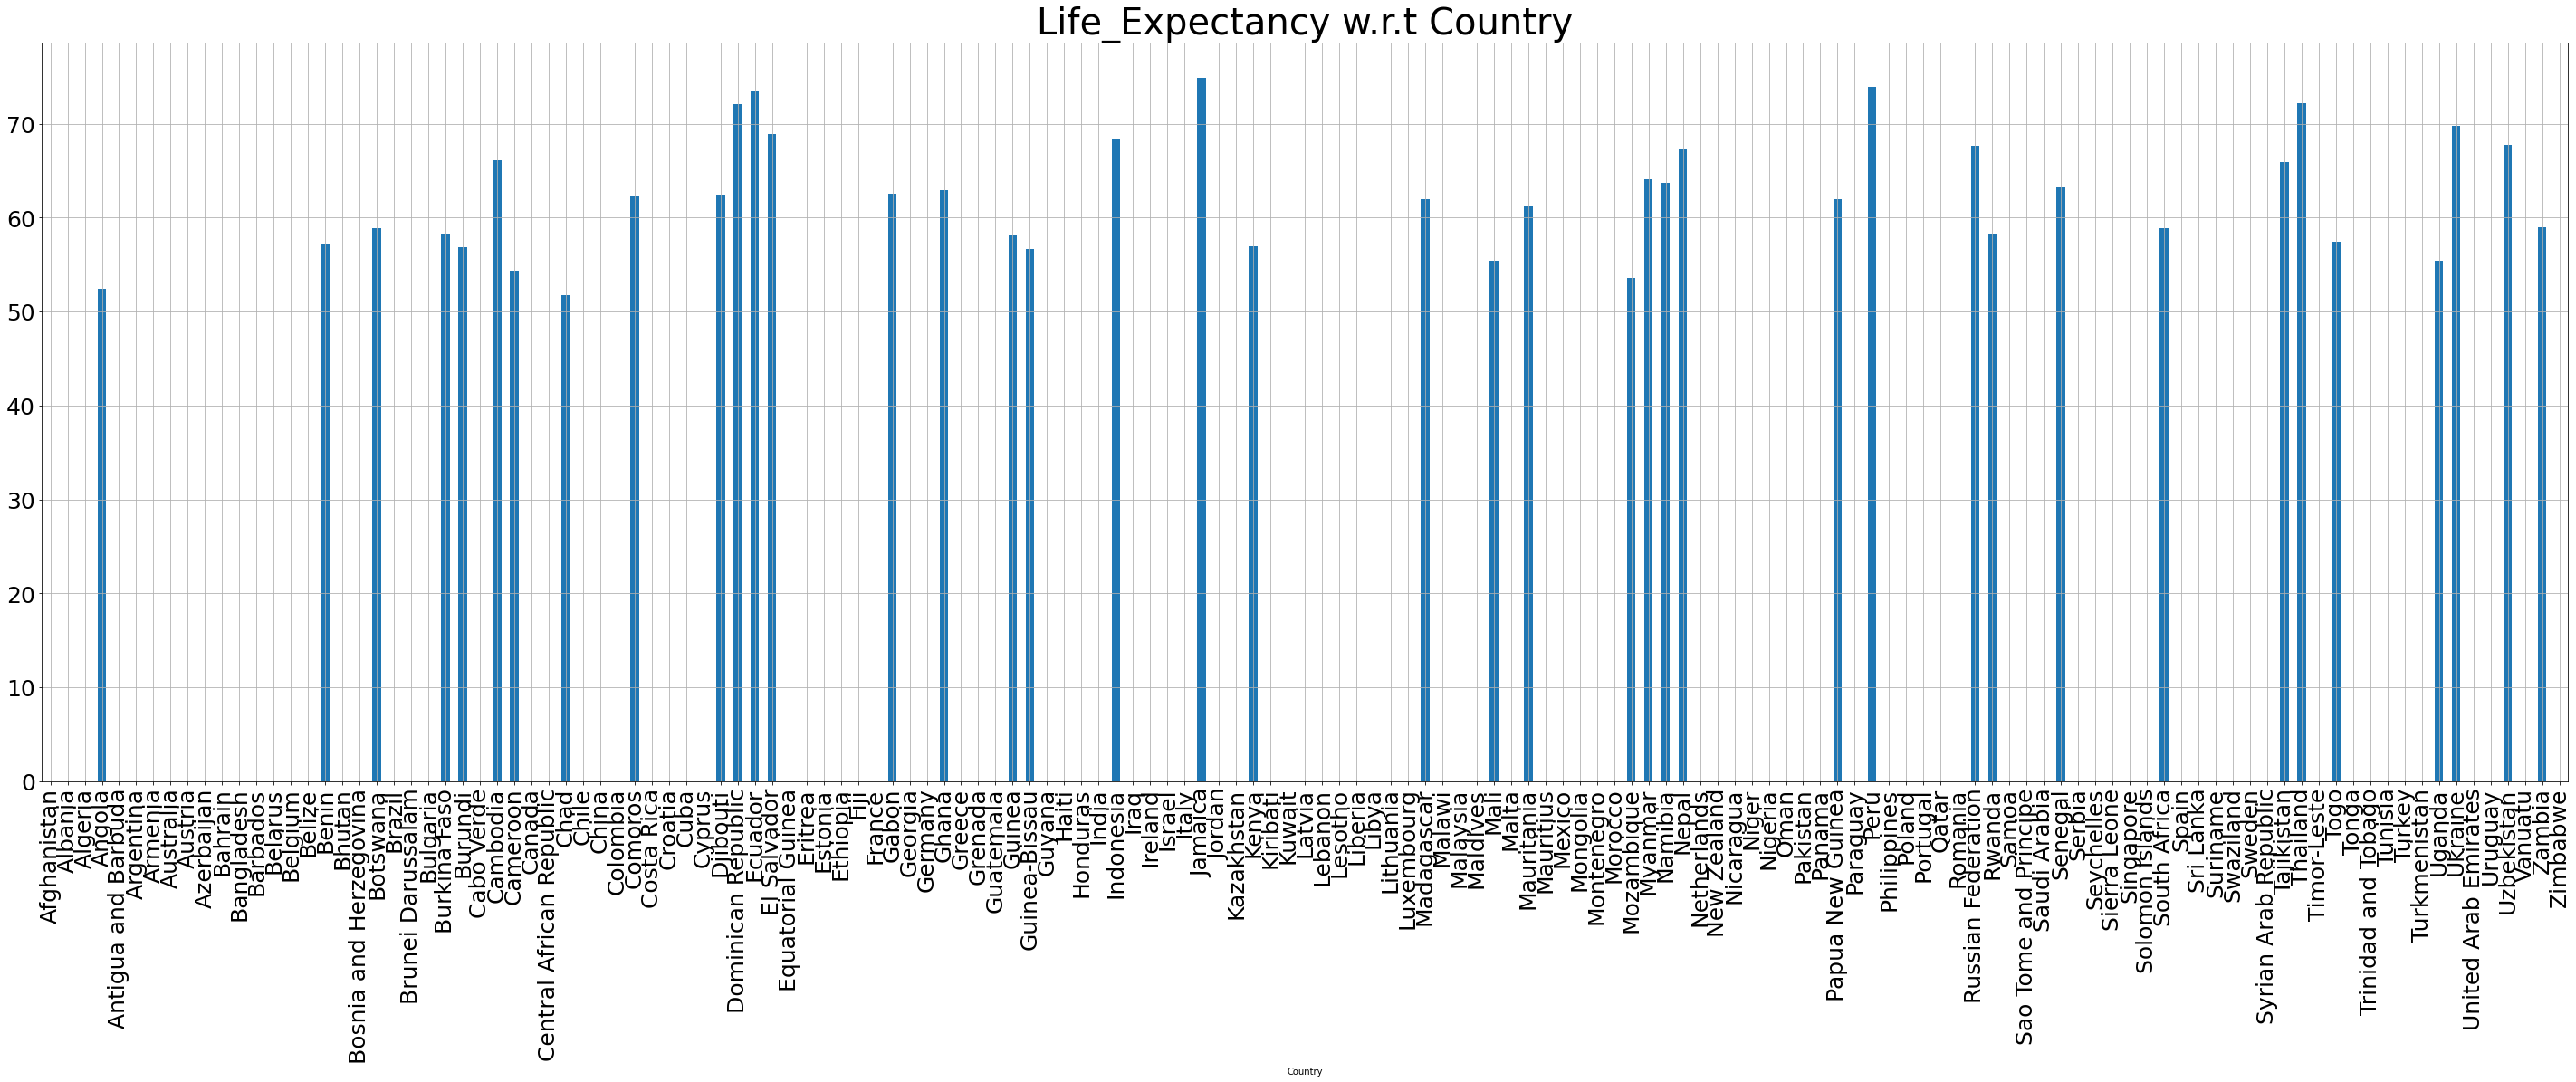

In [42]:
countries = df.groupby('Country')['Life expectancy'].mean()

ax = countries.plot(kind='bar', figsize=(50,15), fontsize=25)
ax.set_title("Life_Expectancy w.r.t Country",fontsize=40)
ax.grid()

Empty columns indicate categories that were present in the original dataset, but disappeared after filtering.

Let's remove these "empty" categories from the general list:

In [43]:
# select only categorical columns
categorical = list(df.select_dtypes('category').columns)

for col in categorical:
  # remove unused categories inplace(!)
  df[col].cat.remove_unused_categories(inplace=True)
  # how to run this without inplace?

# ML-specific preprocessing

## Dummy variables (one-hot encoding)

Dummy variables are a way to encode categorical data in numeric format. 

This is commonly used for machine learning since fundamental math models cannot handle strings / categories by design (in most cases).

Overall, we have 20 columns with 1 target variable.

Among them, we will drop 'Country', 'Continent' and 'Year' features. (Why?)

In [44]:
# Glue list with columns
columns = numeric + categorical
# Drop columns in-place
for x in "Country", "Continent", "Year":
  columns.remove(x)
# Select only remaining columns from the data frame
df = df[columns]

In [45]:
# Replace column Status with dummy variables
ddf = pd.get_dummies(df, columns=['Status'])

In [46]:
ddf

,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling,Status_Developing
49,51.7,348,67,8.33,23.965612,64.0,11699,22.7,101,68.0,3.31,64,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,1
50,51.1,355,69,8.10,35.958573,77.0,8523,22.1,105,67.0,4.26,77,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4,1
51,56.0,358,72,8.24,256.122524,75.0,4458,21.5,110,75.0,3.30,75,2.6,4598.249988,259615.0,8.8,8.6,0.508,10.3,1
52,51.0,361,75,8.06,239.891392,72.0,1449,21.0,115,73.0,3.38,71,2.5,4299.128890,24218565.0,8.9,8.8,0.495,9.4,1
260,59.1,251,25,1.40,110.263362,75.0,426,23.5,39,77.0,5.37,75,1.4,825.942785,94682.0,7.6,7.5,0.454,9.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,67.9,184,22,2.36,13.890212,91.0,2,39.3,25,98.0,5.92,98,0.3,182.286250,27328.0,3.1,3.1,0.644,11.9,1
2406,67.6,185,23,1.96,77.270921,98.0,823,38.1,27,94.0,5.49,96,0.4,654.283837,2648825.0,3.2,3.2,0.626,11.8,1
2431,63.0,328,29,2.41,20.623063,79.0,35,22.3,42,74.0,4.99,79,4.8,185.793359,1515321.0,6.4,6.2,0.565,12.5,1
2433,58.2,366,29,2.57,183.046170,81.0,13234,21.2,44,83.0,4.26,81,6.3,1644.619672,14264756.0,6.6,6.4,0.543,12.0,1


Dummy variables (also known as hot-coded functions) are constructed from categorical data as follows:
1. Add N new columns, where N is the number of categories.
2. For each entry, set 0 for all N categories except one corresponding to the current row category.


*How would you one-hot encode DNA sequences?*

## Train/test split

*Why random_state is fixed in the next block of code?*

In [ ]:
from sklearn.model_selection import train_test_split

Y = ddf.pop("Life expectancy").values
X = ddf.values

print("Before:")
print(f"\tX: {X.shape}; Y: {Y.shape}")


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

print("Train:")
print(f"\tX: {X_train.shape}; Y: {Y_train.shape}")
print("Test:")
print(f"\tX: {X_test.shape}; Y: {Y_test.shape}")


Before:
	X: (1313, 20); Y: (1313,)
Train:
	X: (919, 20); Y: (919,)
Test:
	X: (394, 20); Y: (394,)


## Utilities

Don't be afraid to write functions. Especially for highly repetitive sections of code.

For example, functions for model evaluation on test data.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

def report_quality(model, X_test, Y_test):
  Y_pred = model.predict(X_test)
  print(f"R^2:\t{r2_score(Y_test, Y_pred)}")
  print(f"RMSE:\t{sqrt(mean_squared_error(Y_test, Y_pred))}")
  print(f"MAE:\t{mean_absolute_error(Y_test, Y_pred)}")
  return Y_pred


# Linear models

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=True)
lm.fit(X_train, Y_train)
Y_pred = report_quality(lm, X_test, Y_test)

R^2:	0.8608379335021216
RMSE:	2.915356306813303
MAE:	2.262052550084706


[Text(0, 0.5, 'predicted'),
 Text(0.5, 0, 'observed'),
 Text(0.5, 1.0, 'Observed vs predicted')]

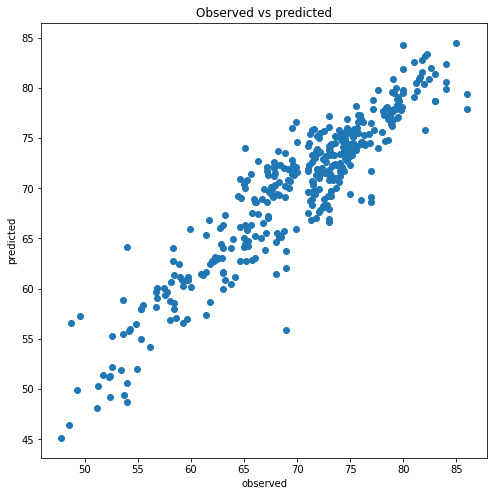

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(Y_test, Y_pred)
plt.gca().set(xlabel='observed', ylabel='predicted', title='Observed vs predicted')

In [ ]:
# Model coefficients
lm.coef_

array([-1.40112706e-02,  7.55413119e-02, -1.76136359e-01,  8.26397117e-04,
       -1.14527144e-03,  9.68391795e-06,  1.29996724e-02, -5.86524747e-02,
       -4.74762622e-04,  2.73448156e-01,  5.85868181e-03, -4.29351882e-01,
       -8.69508487e-05,  9.86354095e-09,  1.32200826e-01, -1.78815785e-01,
        4.23287660e+01, -3.43391334e-01,  1.68769750e-01, -1.68769750e-01])

In [ ]:
assert len(ddf.columns) == len(lm.coef_)

# What are the most "influential" features?
maxposind = lm.coef_.argmax()
print("Highest positive contribution:")
print(f"\tColumn: {ddf.columns[maxposind]}")
print(f"\tWeight: {lm.coef_[maxposind]}")

maxnegind = (-lm.coef_).argmax()
print("Highest negative contribution:")
print(f"\tColumn: {ddf.columns[maxnegind]}")
print(f"\tWeight: {lm.coef_[maxnegind]}")

Highest positive contribution:
	Column: Income composition of resources
	Weight: 42.328766039091086
Highest negative contribution:
	Column: HIV/AIDS
	Weight: -0.42935188173863736


## Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize=True)
lasso.fit(X_train, Y_train)
_ = report_quality(lasso, X_test, Y_test)

R^2:	-0.00042707591962942715
RMSE:	7.816708643617462
MAE:	6.265907546825894


In [ ]:
lasso = Lasso(normalize=True, alpha=1e-2)
lasso.fit(X_train, Y_train)
_ = report_quality(lasso, X_test, Y_test)

R^2:	0.8400043396208193
RMSE:	3.1259736124469475
MAE:	2.4317729558419603


Text(0.5, 1.0, 'Lasso coefficients as a function of the regularization')

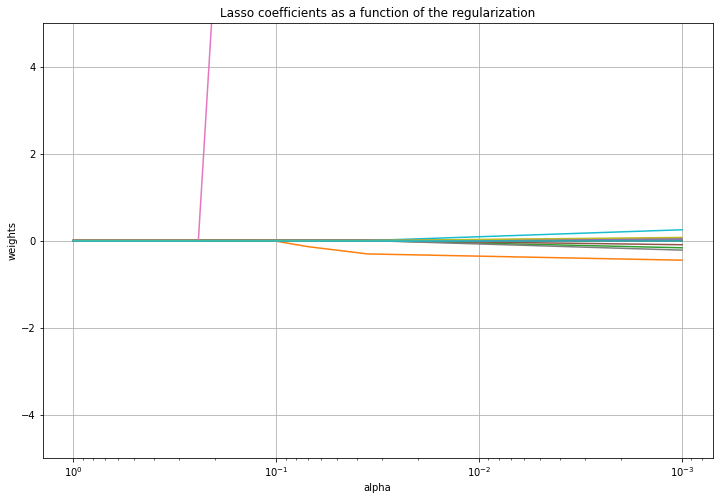

In [ ]:
alphas = np.linspace(1e-3, 1, 30)
model = Lasso(normalize=True)

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, Y_train)
    coefs.append(model.coef_)

plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_xlabel('alpha')
ax.set_ylabel('weights')
ax.set_ylim(-5, 5)
ax.grid()
ax.set_title('Lasso coefficients as a function of the regularization')

Can you guess what coefficient sky-rocketed on the left?

# Cross-validation

One picture can be worth a thousand words:

![crossval](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression(normalize=True)

scores = cross_val_score(lm, X_train, Y_train, cv=10)
scores

array([0.93164508, 0.87243352, 0.88291846, 0.89805203, 0.84034177,
       0.85452287, 0.89887967, 0.86837247, 0.86737622, 0.88199546])

Stop! What are scores here?

If in doubt, check the documentation!

In [ ]:
print(f"R^2: {scores.mean():.3f}")

R^2: 0.880


# Grid search

Same picture as above. We use cross-validation to measure average performance of a particular model.

Model with best hyperparameters is returned.


In [ ]:
from sklearn.model_selection import GridSearchCV

alphas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

model = Lasso(normalize=True, max_iter=2000)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv=5)
grid.fit(X_train, Y_train)

print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)

Best params: {'alpha': 0.0001}
Best cross validaton score 0.8238004911591279


Double check that `sklearn` is not lying to us:

In [ ]:
lasso = Lasso(alpha=0.0001, normalize=True, max_iter=2000)
lasso.fit(X_train, Y_train)
lasso.score(X_test, Y_test)

0.8608165449801056

What are hyperparameters?

What is the difference between them and the coefficients of the fitted model?